# Zomato Data Analysis

### Introduction

In this notebook I have tried to analyze the data present in the dataset of zomato. Feature Engineering for various columns present in the dataset is done and the analysis is shown with the help of various graphs.

The main purpose of the project is to analyze the data and by the analysis find which restaurants are prefer by the customers and by the analysis help zomato to increase its business. 

### Need for choosing the project

- The purpose of the business needs analysis is to clearly understand the business and its needs. A BNA might be completed by a company after identifying they would  like to implement a new strategy. In this case, the company would conduct a BNA to understand the current state, identify the key drivers for change, and then make recommendations or plans for how to implement the new strategy. 

- The major need for choosing this project is to business analysis and on the basis of analysis analyze customer demands and try to provide them with best food as well  as from company point of view help them to grow and provide better services to their customer and try to gain as much profit they can.

### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
pd.options.mode.chained_assignment = None

### Overview of DataSet

In [3]:
data=pd.read_csv('zomato.csv')

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
data.shape

(51717, 17)

In [9]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
print("maximum votes is ",data['votes'].max())
print("minimum votes is ",data['votes'].min())

maximum votes is  16832
minimum votes is  0


In [11]:
data['menu_item'].fillna(0,inplace=True)

C:\Users\nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


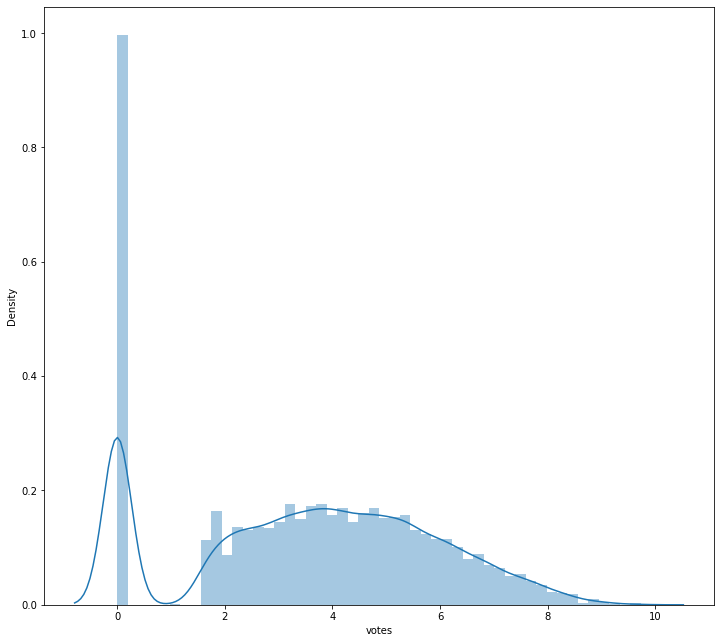

In [12]:
plt.figure(figsize=(12,11))
g=sns.distplot(np.log(data['votes']+1)) 

In [13]:
print(data['rate'])

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object


## Data Cleaning

### Handling missing values for each columns in the dataset

In [14]:
data['rate'].fillna(0,inplace=True)

In [15]:
data['rest_type'].fillna(0,inplace=True)

In [16]:
data['approx_cost(for two people)'].fillna(0,inplace=True)

In [17]:
data['cuisines'].fillna(0,inplace=True)

In [18]:
data['dish_liked'].fillna(0,inplace=True)

## Data Preparation

## Feature Engineering

#### Feature Engineering for 'rate'

In [19]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 0, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
# Applying feature Engineering to change 'rate' from string type to float type(ratings)

In [21]:
rate_ordinal_map={
    '4.1/5':4.1, '3.8/5':3.8, '3.7/5':3.7, '3.6/5':3.6, '4.6/5':4.6, '4.0/5':4.0, '4.2/5':4.2,
       '3.9/5':3.9, '3.1/5':3.1, '3.0/5':3.0, '3.2/5':3.2, '3.3/5':3.3, '2.8/5':2.8, '4.4/5':4.4,
       '4.3/5':4.3, 'NEW':0, '2.9/5':2.9, '3.5/5':3.5, 0:0, '2.6/5':2.6, '3.8 /5':3.8, '3.4/5':3.4,
       '4.5/5':4.5, '2.5/5':2.5, '2.7/5':2.7, '4.7/5':4.7, '2.4/5':2.4, '2.2/5':2.2, '2.3/5':2.3,
       '3.4 /5':3.4, '-':0, '3.6 /5':3.6, '4.8/5':4.8, '3.9 /5':3.9, '4.2 /5':4.2, '4.0 /5':4.0,
       '4.1 /5':4.1, '3.7 /5':3.7, '3.1 /5':3.1, '2.9 /5':2.9, '3.3 /5':3.3, '2.8 /5':2.8,
       '3.5 /5':3.5, '2.7 /5':2.7, '2.5 /5':2.5, '3.2 /5':3.2, '2.6 /5':2.6, '4.5 /5':4.5,
       '4.3 /5':4.3, '4.4 /5':4.4, '4.9/5':4.9, '2.1/5':2.1, '2.0/5':2.0, '1.8/5':1.8, '4.6 /5':4.6,
       '4.9 /5':4.9, '3.0 /5':3.0, '4.8 /5':4.8, '2.3 /5':2.3, '4.7 /5':4.7, '2.4 /5':2.4,
       '2.1 /5':2.1, '2.2 /5':2.2, '2.0 /5':2.0, '1.8 /5':1.8,
    
}
data['ratings']=data['rate'].map(rate_ordinal_map)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),ratings
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [22]:
# delete the previous column 'rate'
data.drop('rate',inplace=True,axis=1)

In [23]:
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),ratings
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


### Feature engineering for column 'online_order'

In [24]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
online_order_ordinal_map={
    'Yes':1,'No':0,
}
data['OnlineOrderLabel']=data['online_order'].map(online_order_ordinal_map)
#data.drop('online_order',inplace=True) #delete the previous column 'online_order'
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),ratings,OnlineOrderLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,0


In [26]:
data.drop('online_order',inplace=True,axis=1) #delete the previous column 'online_order'
data.head()

,url,address,name,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),ratings,OnlineOrderLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,0


### Feature engineering for column 'book_table'

In [27]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
booktable_ordinal_map={
    'Yes':1,'No':0,
}
data['BookTableLabel']=data['book_table'].map(booktable_ordinal_map)
data.drop('book_table',inplace=True,axis=1) #delete the previous column 'book_table'
data.head()

,url,address,name,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),ratings,OnlineOrderLabel,BookTableLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,1,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,1,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,0,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,0,0


In [29]:
data.drop('menu_item',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),ratings,OnlineOrderLabel,BookTableLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,1,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,1,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,0,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,0,0


### Applying Feature engineering for "rest_type" in the dataset

In [30]:
from sklearn.preprocessing import LabelEncoder
leo=LabelEncoder()

In [31]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 0, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       '

In [32]:
gen_ordinal_map={
    'Casual Dining':1, 'Cafe, Casual Dining':2, 'Quick Bites':3,
       'Casual Dining, Cafe':4, 'Cafe':5, 'Quick Bites, Cafe':6,
       'Cafe, Quick Bites':7, 'Delivery':8, 'Mess':9, 'Dessert Parlor':10,
       'Bakery, Dessert Parlor':11, 'Pub':12, 'Bakery':13, 'Takeaway, Delivery':14,
       'Fine Dining':15, 'Beverage Shop':16, 'Sweet Shop':17, 'Bar':18,
       'Beverage Shop, Quick Bites':19, 'Confectionery':20,
       'Quick Bites, Beverage Shop':21, 'Dessert Parlor, Sweet Shop':22,
       'Bakery, Quick Bites':23, 'Sweet Shop, Quick Bites':24, 'Kiosk':25,
       'Food Truck':26, 'Quick Bites, Dessert Parlor':27,
       'Beverage Shop, Dessert Parlor':28, 'Takeaway':29, 'Pub, Casual Dining':30,
       'Casual Dining, Bar':31, 'Dessert Parlor, Beverage Shop':32,
       'Quick Bites, Bakery':33, 'Dessert Parlor, Quick Bites':34,
       'Microbrewery, Casual Dining':35, 'Lounge':36, 'Bar, Casual Dining':37,
       'Food Court':38, 'Cafe, Bakery':39, 0:40, 'Dhaba':41,
       'Quick Bites, Sweet Shop':42, 'Microbrewery':43,
       'Food Court, Quick Bites':44, 'Pub, Bar':45, 'Casual Dining, Pub':46,
       'Lounge, Bar':47, 'Food Court, Dessert Parlor':48,
       'Casual Dining, Sweet Shop':49, 'Food Court, Casual Dining':50,
       'Casual Dining, Microbrewery':51, 'Sweet Shop, Dessert Parlor':52,
       'Bakery, Beverage Shop':53, 'Lounge, Casual Dining':54,
       'Cafe, Food Court':55, 'Beverage Shop, Cafe':56, 'Cafe, Dessert Parlor':57,
       'Dessert Parlor, Cafe':58, 'Dessert Parlor, Bakery':59,
       'Microbrewery, Pub':60, 'Bakery, Food Court':61, 'Club':62,
       'Quick Bites, Food Court':63, 'Bakery, Cafe':64, 'Bar, Cafe':65,
       'Pub, Cafe':66, 'Casual Dining, Irani Cafee':67, 'Fine Dining, Lounge':68,
       'Bar, Quick Bites':69, 'Bakery, Kiosk':70, 'Pub, Microbrewery':71,
       'Microbrewery, Lounge':72, 'Fine Dining, Microbrewery':73,
       'Fine Dining, Bar':74, 'Mess, Quick Bites':75, 'Dessert Parlor, Kiosk':76,
       'Bhojanalya':77, 'Casual Dining, Quick Bites':78, 'Pop Up':79, 'Cafe, Bar':80,
       'Casual Dining, Lounge':81, 'Bakery, Sweet Shop':82, 'Microbrewery, Bar':83,
       'Cafe, Lounge':84, 'Bar, Pub':85, 'Lounge, Cafe':86, 'Club, Casual Dining':87,
       'Quick Bites, Mess':88, 'Quick Bites, Meat Shop':89,
       'Quick Bites, Kiosk':90, 'Lounge, Microbrewery':91,
       'Food Court, Beverage Shop':92, 'Dessert Parlor, Food Court':93,
       'Bar, Lounge':94,
    
}
data['RestLabel']=data['rest_type'].map(gen_ordinal_map)
data.drop('rest_type',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,1,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,1,0,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,1,0,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,0,0,3
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,0,0,1


### Feature enginnering for 'listed_in(type)' in dataset using LabelEncoder

In [33]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
leo=LabelEncoder()

In [35]:
genre_label=leo.fit_transform(data['listed_in(type)'])
genre_label

array([0, 0, 0, ..., 6, 6, 6])

In [36]:
en=leo.classes_
en
genre_map={index:label for index ,label in enumerate(en)}
genre_map

{0: 'Buffet',
 1: 'Cafes',
 2: 'Delivery',
 3: 'Desserts',
 4: 'Dine-out',
 5: 'Drinks & nightlife',
 6: 'Pubs and bars'}

In [37]:
#Adding the new values into dataframe/dataset
data['Listed_In(type)']=genre_label
data.drop('listed_in(type)',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel,Listed_In(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,4.1,1,1,1,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,4.1,1,0,1,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3.8,1,0,2,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,3.7,0,0,3,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,3.8,0,0,1,0


### Feature engineering for 'approx_cost(for two people)'

In [38]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 0, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [39]:
appcost_map={
    '800':1, '300':2, '600':3, '700':4, '550':5, '500':6, '450':7, '650':8, '400':9,
       '900':10, '200':11, '750':12, '150':13, '850':14, '100':15, '1,200':16, '350':17, '250':18,
       '950':19, '1,000':20, '1,500':21, '1,300':22, '199':23, '80':24, '1,100':25, '160':26,
       '1,600':27, '230':28, '130':29, '50':30, '190':31, '1,700':32, 0:0, '1,400':33, '180':34,
       '1,350':35, '2,200':36, '2,000':37, '1,800':38, '1,900':39, '330':40, '2,500':41,
       '2,100':42, '3,000':43, '2,800':44, '3,400':45, '40':46, '1,250':47, '3,500':48,
       '4,000':49, '2,400':50, '2,600':51, '120':52, '1,450':53, '469':54, '70':55, '3,200':56,
       '60':57, '560':58, '240':59, '360':60, '6,000':61, '1,050':62, '2,300':63, '4,100':64,
       '5,000':65, '3,700':66, '1,650':67, '2,700':68, '4,500':69, '140':70,
}
data['AppCostLabel']=data['approx_cost(for two people)'].map(appcost_map)
data.drop('approx_cost(for two people)',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,dish_liked,cuisines,reviews_list,listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel,Listed_In(type),AppCostLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,4.1,1,1,1,0,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,4.1,1,0,1,0,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3.8,1,0,2,0,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,3.7,0,0,3,0,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,3.8,0,0,1,0,3


### Feature engineering for 'cuisines'

In [40]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [41]:
cuisines_map={
    'North Indian, Mughlai, Chinese':1, 'Chinese, North Indian, Thai':2,
       'Cafe, Mexican, Italian':3, ...:0,
       'North Indian, Street Food, Biryani':4, 'Chinese, Mughlai':5,
       'North Indian, Chinese, Arabian, Momos':6,
    
}
data['CuisinesLabel']=data['cuisines'].map(cuisines_map)
data.drop('cuisines',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,dish_liked,reviews_list,listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel,Listed_In(type),AppCostLabel,CuisinesLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,4.1,1,1,1,0,1,1.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,4.1,1,0,1,0,1,2.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3.8,1,0,2,0,1,3.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,Masala Dosa,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,3.7,0,0,3,0,2,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"Panipuri, Gol Gappe","[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,3.8,0,0,1,0,3,NaN


In [42]:
data['CuisinesLabel'].fillna(0,inplace=True)

### Feature engineering for 'dish_liked'

In [43]:
data['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [44]:
dish_map={
   'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup':1,
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani':2,
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza':3,
       ...:0,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian':4,
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani':5,
       'Biryani, Andhra Meal':6,
    
}
data['DishLabel']=data['dish_liked'].map(dish_map)
data.drop('dish_liked',inplace=True,axis=1)
data.head()

,url,address,name,votes,phone,location,reviews_list,listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel,Listed_In(type),AppCostLabel,CuisinesLabel,DishLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,4.1,1,1,1,0,1,1.0,1.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,4.1,1,0,1,0,1,2.0,2.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3.8,1,0,2,0,1,3.0,3.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,3.7,0,0,3,0,2,0.0,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,3.8,0,0,1,0,3,0.0,NaN


In [45]:
data['DishLabel'].fillna(0,inplace=True)

# Data Exploration and Visualization

In [46]:
corrMatrix=data.corr()

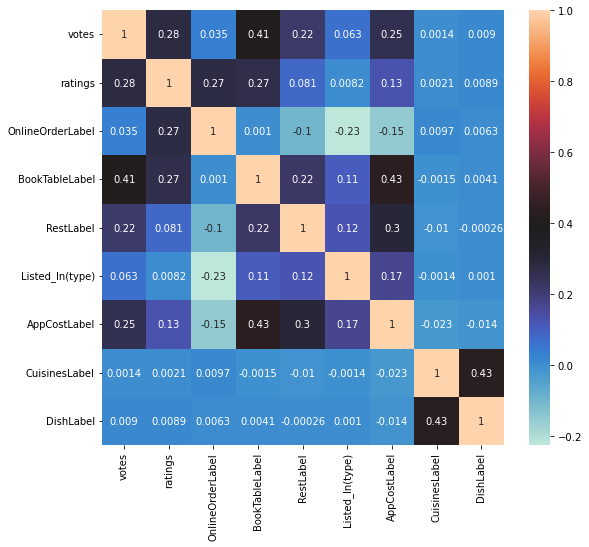

In [47]:
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(corrMatrix,annot=True,cmap='icefire')

<AxesSubplot:xlabel='count', ylabel='ratings'>

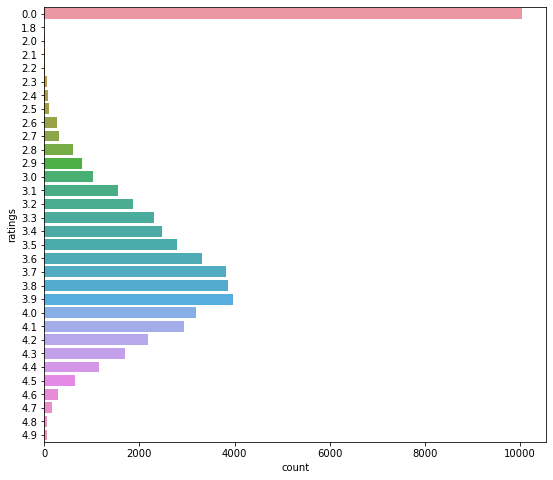

In [48]:
plt.figure(figsize=(9,8))
sns.countplot(y='ratings',data=data)

<AxesSubplot:xlabel='count', ylabel='ratings'>

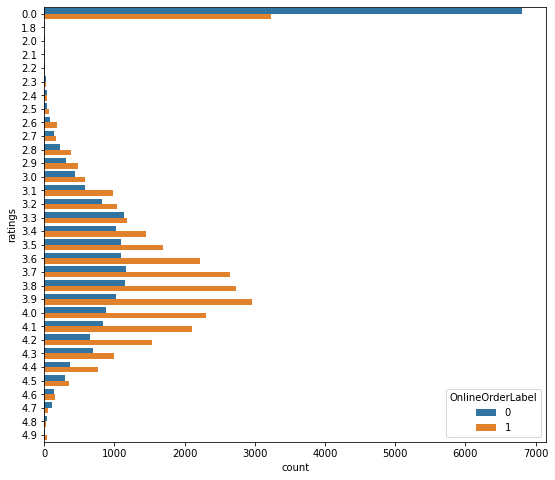

In [49]:
plt.figure(figsize=(9,8))
sns.countplot(y="ratings", hue="OnlineOrderLabel", data=data)

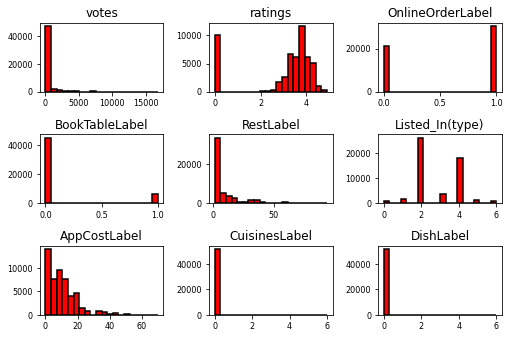

In [50]:
data.hist(bins=20, color='red',edgecolor='black',
             linewidth=1.5,xlabelsize=8,
             ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

<AxesSubplot:xlabel='ratings', ylabel='votes'>

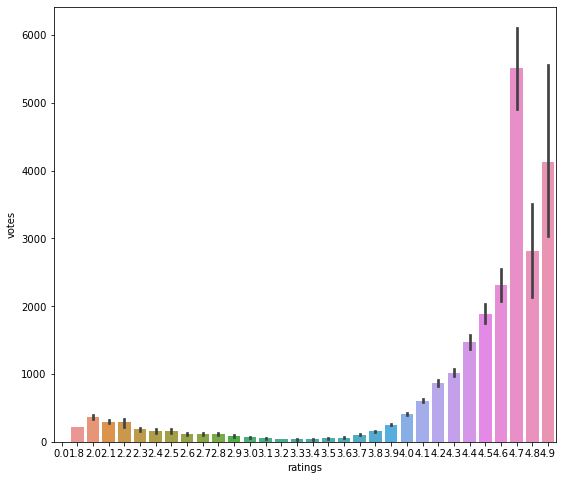

In [51]:
plt.figure(figsize=(9,8))
sns.barplot(x='ratings',y='votes',data=data)

C:\Users\nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


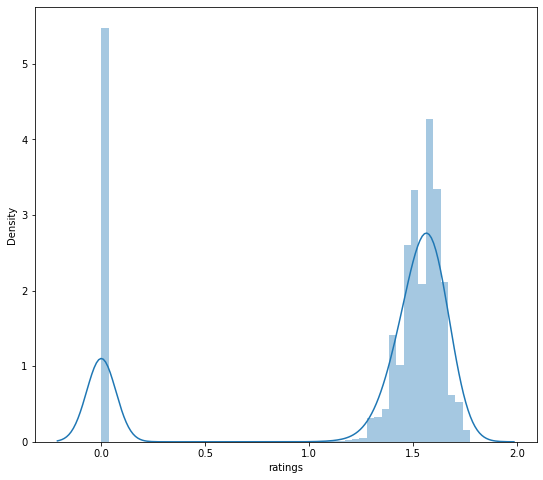

In [52]:
plt.figure(figsize=(9,8))
g=sns.distplot(np.log(data['ratings']+1))

<AxesSubplot:xlabel='BookTableLabel', ylabel='votes'>

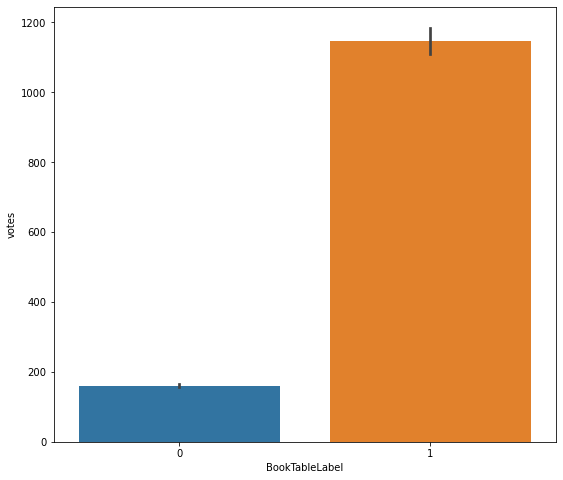

In [53]:
plt.figure(figsize=(9,8))
sns.barplot(x='BookTableLabel',y='votes',data=data)

<AxesSubplot:xlabel='OnlineOrderLabel', ylabel='votes'>

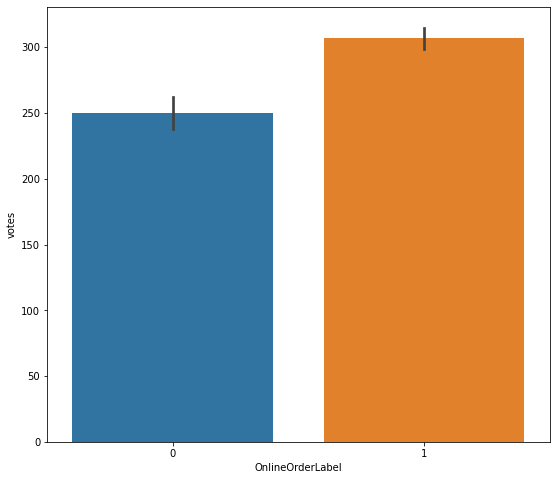

In [54]:
plt.figure(figsize=(9,8))
sns.barplot(x='OnlineOrderLabel',y='votes',data=data)

<AxesSubplot:xlabel='ratings', ylabel='AppCostLabel'>

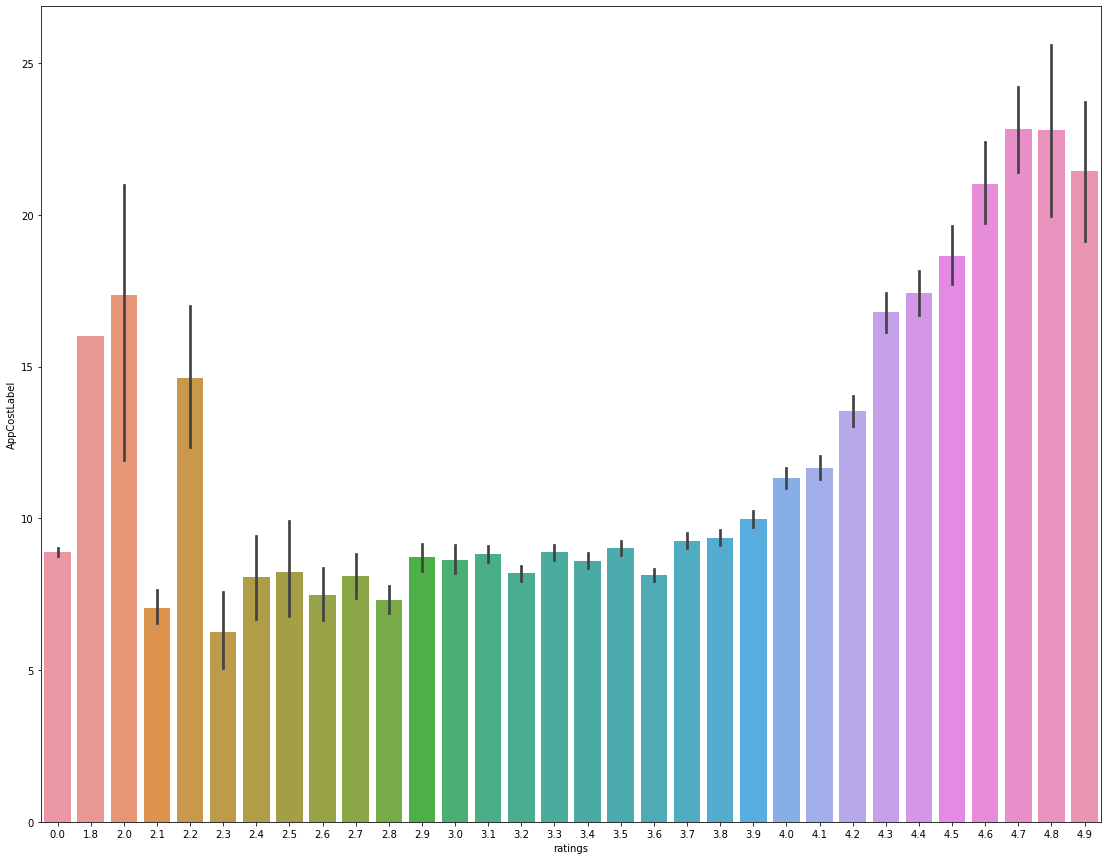

In [55]:
plt.figure(figsize=(19,15))
sns.barplot(x='ratings',y='AppCostLabel',data=data)

In [56]:
data.head()

,url,address,name,votes,phone,location,reviews_list,listed_in(city),ratings,OnlineOrderLabel,BookTableLabel,RestLabel,Listed_In(type),AppCostLabel,CuisinesLabel,DishLabel
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,080 42297555\r\n+91 9743772233,Banashankari,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,4.1,1,1,1,0,1,1.0,1.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,080 41714161,Banashankari,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,4.1,1,0,1,0,1,2.0,2.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,918,+91 9663487993,Banashankari,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3.8,1,0,2,0,1,3.0,3.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,88,+91 9620009302,Banashankari,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,3.7,0,0,3,0,2,0.0,0.0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,3.8,0,0,1,0,3,0.0,0.0


<AxesSubplot:xlabel='BookTableLabel', ylabel='AppCostLabel'>

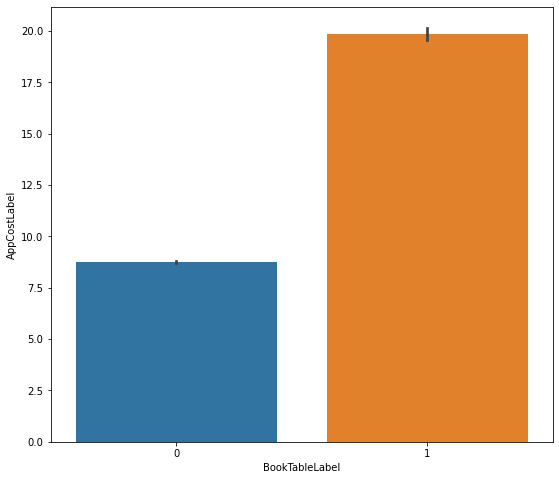

In [57]:
plt.figure(figsize=(9,8))
sns.barplot(x='BookTableLabel',y='AppCostLabel',data=data)

C:\Users\nehak\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


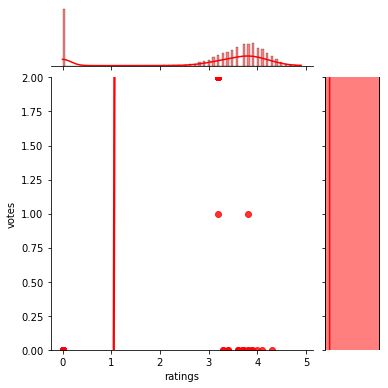

In [58]:
#joint plot
sns.jointplot(x='ratings',y='votes',data=data,
             kind='reg',ylim=(0,2),color='red',
             size=5.5,ratio=4)

<AxesSubplot:xlabel='ratings', ylabel='BookTableLabel'>

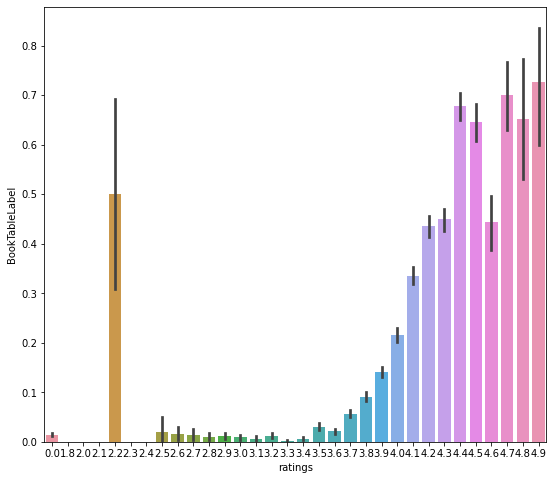

In [59]:
plt.figure(figsize=(9,8))
sns.barplot(x='ratings',y='BookTableLabel',data=data)

<AxesSubplot:xlabel='ratings', ylabel='RestLabel'>

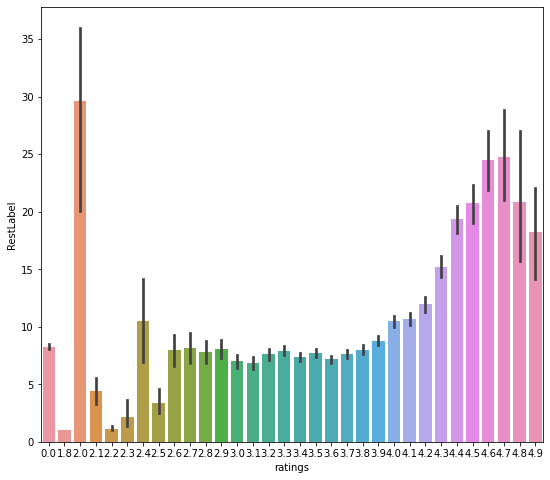

In [60]:
plt.figure(figsize=(9,8))
sns.barplot(y='RestLabel',x='ratings',data=data)

In [61]:
h=data['ratings'].values
freq=data['AppCostLabel'].values
print(len(h),len(freq))

51717 51717


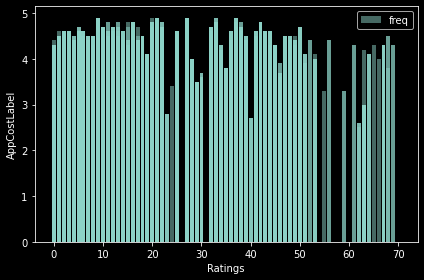

In [62]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    
    plt.bar(freq,h,alpha=0.5,align='center',label='freq')
    plt.ylabel("AppCostLabel")
    plt.xlabel("Ratings")
    plt.legend(loc="best")
    plt.tight_layout()

### Conclusion

On reading the dataset and analyzing the dataset we found a that there are total 51717 rows and 17 columns in our dataset. 

Then we plotted various graphs and from the graphs we can conclude the following observations:- 
-  The restaurants with 4.7 customer ratings got 6000 votes (approx). 
-  The restaurants with 4.9 customer ratings got 4000 votes (approx). 
-  The restaurants which had the facility of booking the tables had more number of votes. 
-  The restaurants which had the facility of online food booking had approx 300 votes. 
-  The restaurants which had more cost for 2 persons had more ratings therefore we can conclude the resturants which are expensive provide good service .

We can finally conclude from our visualizations and analysis of data that:- 
1.  User perfer more votings and ratings restaurants. 
2.  Restaurants with more ratings and votes are expensive. 
3.  The restaurants which have table booking facility are more prefered. 
4.  The restaurants which have online ordering facility are more popular.
5.  The restaurants with more ratings and votes have more good food and are more popular.